In [ ]:
import pandas

tanggal = ["Month"]

origin = pandas.read_table("/content/airline.csv", sep=",", parse_dates=tanggal)

origin.iloc[:5]

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
origin.tail()

,Month,#Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [ ]:
origin.isnull().sum().sum()

0

In [ ]:
origin["Month"].dtype

dtype('<M8[ns]')

In [ ]:
origin = origin.sort_values("Month")

origin = origin.set_index("Month")

origin.iloc[:5]

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
origin.columns = ["Monthly"]

origin.iloc[:5]

,Monthly
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
origin.tail()

,Monthly
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


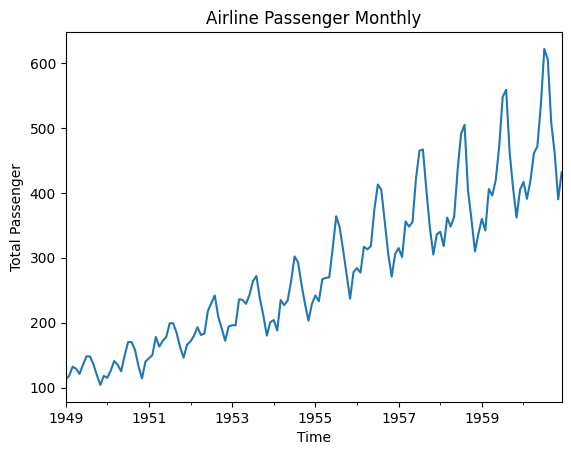

In [ ]:
title = "Airline Passenger Monthly"

xlabel = "Time"

ylabel = "Total Passenger"

origin["Monthly"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

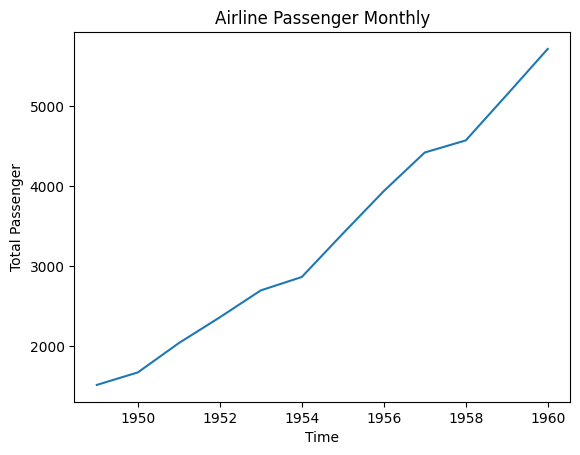

In [ ]:
total = origin.groupby(origin.index.year)["Monthly"].sum()

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

In [ ]:
from statsmodels.tsa.stattools import adfuller

tester = adfuller(origin["Monthly"], autolag="AIC")

result_p = tester[1]

result_p

0.991880243437641

In [ ]:
tester = adfuller(origin["Monthly"])

result_p = tester[1]

result_p

0.991880243437641